## Projeto Elementos Finitos - Equação do Calor

### Aluno: Vitor Mazal Krauss


#### Objetivos:
1. Apresentar a formulação de Galerkin para a Equação da Onda no tempo.
2. Considerar uma malha do domínio e apresentar a formulação em termos de elementos finitos.
3. Resolver a equação do calor no caso estacionário.
4. Resolver a equação da onda ao longo do tempo.

*Obs*: as rotinas numéricas são implementadas em C++. Os gráficos e animações são feitos no Python. Este Notebook não contém códigos, aqui apenas apresentamos os resultados obtidos.

### Parte 1: formulação

Nós consideramos a forma mais geral da equação do calor:

$$\rho C_v \frac{\partial T}{\partial t} - \nabla \bullet [\kappa \bullet \nabla T ] = s(\mathbf{x}, t)$$

Seja $\Omega \subset \mathbb{R}^n$ um conjunto e seja $\Gamma = \partial \Omega$ a sua fronteira. Suponha que $\Gamma = \overline{\Gamma}_{T} \cup \overline{\Gamma}_{q}$ tais que $\Gamma_{T} \cap \Gamma_{q} = \emptyset$.

Consideramos a seguinte condição de fronteira de Dirichlet em $\Gamma_{T}$:

$$ T(\mathbf{x}, t) = \overline{T}(\mathbf{x}, t), \; \text{ em } \Gamma_{T}$$

E também consideramos a seguinte condição de fronteira de Neumann em $\Gamma_{q}$:

$$ -[\kappa \cdot \nabla T] \bullet n = \overline{q}, \; \text{ em } \Gamma_{q}$$

Assim, temos o seguinte problema de valor de contorno:

###### Formulação Forte

$$ \begin{cases}
\rho C_v \frac{\partial T}{\partial t} - \nabla \bullet [\kappa \bullet \nabla T ] = s \text{ em } \Omega \\ \\
T(\mathbf{x}, t) = \overline{T}(\mathbf{x}, t), \; \text{ em } \Gamma_{T} \\ \\
-[\kappa \cdot \nabla T] \bullet n = \overline{q}, \; \text{ em } \Gamma_{q} \\ \\
\end{cases} $$

Seja $\mathcal{V} = \{ v: \overline{\Omega} \rightarrow \mathbb{R} \mid v \in \mathcal{H}^1(\Omega) \; , \; v(\mathbf{x}) = 0 \text{ em } \Gamma_T \}$ o conjunto das funções peso.

Seja $\mathcal{S} = \{ T: \overline{\Omega} \times [0, t] \rightarrow \mathbb{R} \mid T \in \mathcal{H}^1(\Omega \times [0, t]), T(\mathbf{x}, t) = \overline{T}(\mathbf{x}, t) \text{ em } \Gamma_T  \}$ o conjunto das funções de teste. 

Seja $w \in \mathcal{V}$ e multiplique ambos os lados da equação diferencial por $w$. Com isso, obtemos 

$$ \rho C_v \frac{\partial T}{\partial t} w - \nabla \bullet [\kappa \bullet \nabla T ] w = s w \text{ em } \Omega $$

Integrando ambos os lados em $\Omega$, obtemos 

$$ \int_{\Omega} \rho C_v \frac{\partial T}{\partial t} w \; dV - \int_{\Omega} \nabla \bullet [\kappa \bullet \nabla T ] w \; dV = \int_{\Omega} s w \; dV  $$

Como $w, T \in \mathcal{H}^1$, podemos notar que $$\nabla \bullet [\kappa \bullet \nabla T ] w = \nabla \bullet [w (\kappa \bullet \nabla T)] - (\nabla w) \bullet (\kappa \bullet \nabla T)$$

Substituindo isso na segunda integral, obtemos que $$ \int_{\Omega} \nabla \bullet [\kappa \bullet \nabla T ] w \; dV = \int_{\Omega} \nabla \bullet [w (\kappa \bullet \nabla T)] \; dV - \int_{\Omega} (\nabla w) \bullet (\kappa \bullet \nabla T) \; dV$$

Agora, pelo teorema de Gauss, temos que $$ \int_{\Omega} \nabla \bullet [w (\kappa \bullet \nabla T)] \; dV = \int_{\Gamma} w (\kappa \bullet \nabla T) \bullet n \; dA $$

Como $w(\mathbf{x}) = 0 \text{ em } \Gamma_T$, então $$ \int_{\Gamma} w (\kappa \bullet \nabla T) \bullet n \; dA = \int_{\Gamma_q} w (\kappa \bullet \nabla T) \bullet n \; dA $$

Além disso, a condição de Neumann nos dá que $-[\kappa \cdot \nabla T] \bullet n = \overline{q}, \; \text{ em } \Gamma_{q}$. Logo $$ \int_{\Gamma_q} w (\kappa \bullet \nabla T) \bullet n \; dA = \int_{\Gamma_q} w \overline{q} \; dA $$

Substituindo estes termos de volta na equação, obtemos 

$$ \int_{\Omega} \rho C_v \frac{\partial T}{\partial t} w \; dV + \int_{\Omega} (\nabla w) \bullet (\kappa \bullet \nabla T) \; dV = \int_{\Omega} s w \; dV - \int_{\Gamma_q} w \overline{q} \; dA $$ 

Fazendo um processo análogo com as condições de fronteira, obtemos também que $$ \int_{\Omega} \rho C_v T(0) \; dV = \int_{\Omega} \rho C_v T_0 \; dV $$

Assim, obtemos a formulação variacional do problema:

###### Formulação Variacional
$$\begin{cases}
\int_{\Omega} \rho C_v \frac{\partial T}{\partial t} w \; dV + \int_{\Omega} (\nabla w) \bullet (\kappa \bullet \nabla T) \; dV = \int_{\Omega} s w \; dV - \int_{\Gamma_q} w \overline{q} \; dA \\ \\ 
\int_{\Omega} \rho C_v T(0) \; dV = \int_{\Omega} \rho C_v T_0 \; dV \\
\end{cases} $$

Agora seja $\mathcal{W}^h \subset \mathcal{W}$ um aproximação de dimensão finita para o espaço $\mathcal{W}$ e $\mathcal{S}^h \subset \mathcal{S}$ uma aproximação finita para o espaço $\mathcal{S}$. 

Sejam $v_h, w_h \in \mathcal{W}^h$. Seja $T_h \in \mathcal{S}^h$ e suponha que $T_h = v_h + \overline{T}_h$. Substituindo na formulação variacional, obtemos a seguinte formulação de Galerkin:

###### Formulação de Galerkin

$$\begin{cases}
\int_{\Omega} \rho C_v \frac{\partial v_h}{\partial t} w_h \; dV + \int_{\Omega} (\nabla w_h) \bullet (\kappa \bullet \nabla v_h) \; dV = \int_{\Omega} s w_h \; dV - \int_{\Gamma_q} w_h \overline{q} \; dA - \int_{\Omega} \rho C_v \frac{\partial \overline{T}_h}{\partial t} w_h \; dV - \int_{\Omega} (\nabla w_h) \bullet (\kappa \bullet \nabla \overline{T}_h) \; dV \\ \\ 
\int_{\Omega} \rho C_v v_h(0) \; dV = \int_{\Omega} \rho C_v T_0 \; dV - \int_{\Omega} \rho C_v \overline{T}_h(0) \; dV \\
\end{cases} $$

###### Elementos Finitos

Agora consideremos uma partição $P = \{ 1, 2, \ldots, N \}$ de $\overline{\Omega}$. Seja $P^T = P \cap \Gamma_T$ o conjunto dos nós com temperatura prescrita. Assim, $P - P^T$ é o conjunto de nós na qual a temperatura deve ser determinada. Seja $n  = \left\vert P - P^T \right\vert $. 

Vamos considerar $v_h(\mathbf{x}, t) = \sum_{i \in P - P^T} T_i(t) N_i(\mathbf{x})$ e $\overline{T}_h(\mathbf{x}, t) = \sum_{i \in P^T} \overline{T}_i(t) N_i(\mathbf{x})$

Substituindo $v_h, T_h$ na formulação de Galerkin e considerando $w_h = \sum_{j \in P - P^T} N_j$, obtemos o seguinte sistema linear:

$$ \mathbf{M} \dot{\mathbf{T}} + \mathbf{K} \mathbf{{T}} = \mathbf{F} $$

onde 

$$ M_{ij} = \int_{\Omega} \rho C_v N_i N_j \; dV$$

$$ K_{ij} = \int_{\Omega} \nabla N_i \bullet [\kappa \bullet \nabla N_j] \; dV $$

$$ f_i = \int_{\Omega} s \; N_i \; dV - \int_{\Gamma_q} N_i \overline{q} \; dA - \sum_{k} M_{ik} \dot{\overline{T}}_k - K_{ik} \overline{T}_k  $$

Quanto aos elementos, vamos considerar elementos com quatro nós cada. Em cada elemento, consideramos funções de interpolação $N_{i}^{e} = a_{i}^{e} + b_{i}^{e} x + c_{i}^{e} y + d_{i}^{e} xy$ tais que $N_{i}^{e} = 1$ no $i$-ésimo nó local e $N_{i}^{e} = 0$ nos demais nós locais. Assim, considerando apenas a contribuição de cada elemento, podemos definir as matrizes locais da seguinte forma:

$$ M_{ij}^{e} = \int_{\Omega} \rho C_v N_i^{e} N_j^{e} \; dV$$

$$ K_{ij}^{e} = \int_{\Omega} \nabla N_i^{e} \bullet [\kappa \bullet \nabla N_j^{e}] \; dV $$

$$ f_i^{e} = \int_{\Omega} s \; N_i^{e} \; dV - \int_{\Gamma_q} N_i^{e} \overline{q} \; dA - \sum_{k} M_{ik}^{e} \dot{\overline{T}}_k - K_{ik}^{e} \overline{T}_k  $$

Para o cálculo das integrais, vamos considerar o mapeamento isoparamétrico, que mapeia cada elemento com o quadrado de vértices $\{ (-1, -1), (1, -1), (1, 1), (-1, 1)$. Com isso, utilizaremos a quadratura gaussiana para calcular numericamente as integrais necessárias. 






### Parte 2: aplicação

Nosso primeiro objetivo é resolver a equação estacionária de calor $-\nabla [\alpha \bullet \nabla T] = 0$ no domínio abaixo.

Aqui, $\alpha(\mathbf{x}) = \frac{\kappa}{\rho C_v} (\mathbf{x})$ é a chamada difusividade térmica do material.

Note também que a equação estácionária é um caso particular da equação do calor trabalhada acima quando $\frac{\partial T}{\partial t} = 0, s = 0$.

In [1]:
import os
from IPython.display import Video, Image

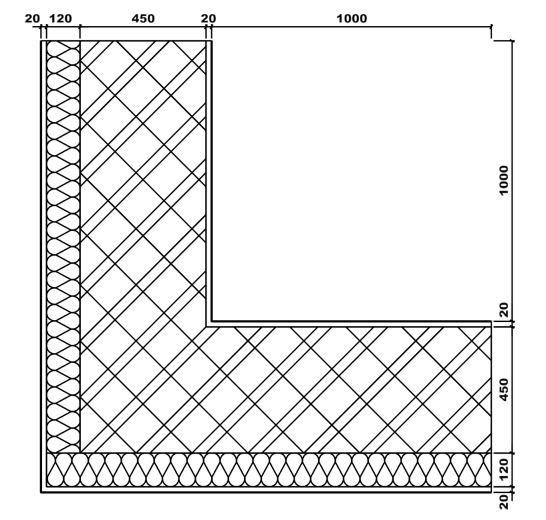

In [2]:
Image("l_domain.png")

Note que há quatro regiões distintas.

Consideraremos três materiais diferentes: 
1. Na duas regiões menores consideramos o material como gesso, com $\kappa = 0.431$, $\rho = 1250$ e $C_v = 1088$.
2. Na maior região consideramos o material como tijolo(de argila), com com $\kappa = 1.297$, $\rho = 1980$ e $C_v = 732$.
3. Na região restante consideramos um material termicamente isolante, com $\kappa = 0.121$, $\rho = 330$ e $C_v = 837$.

Os materiais podem ser consultados em https://thermtest.com/materials-database# sob os nomes de "Plaster Building", "Fireclay Brick" e "Mica Insulating Powder". 

As condições de contorno são ilustradas abaixo:

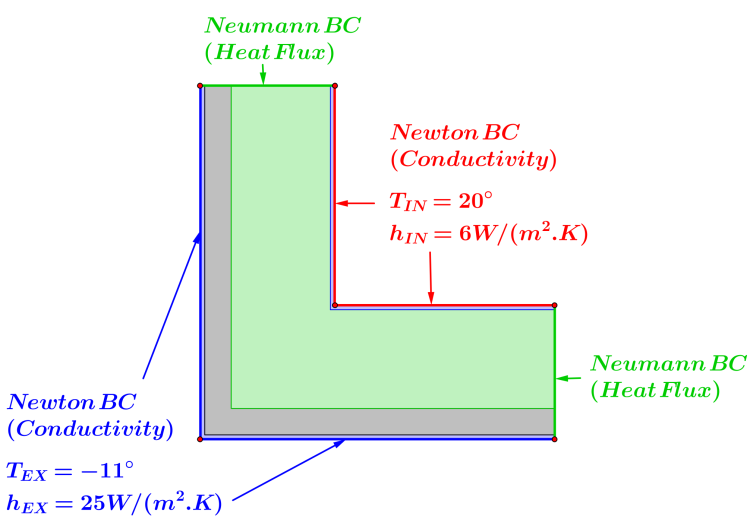

In [3]:
Image("boundary.png")

#### Problema Estacionário:

Para geração da malha, vamos utilizar a biblioteca CALFEM para o Python. Uma vez gerada a malha, exportamos as informações necessários e realizamos toda a parte numérica da implementação no C++, devido à sua melhor performance. Os resultados são então importados para o Python para geração dos gráficos.

A malha é ilustrada abaixo:

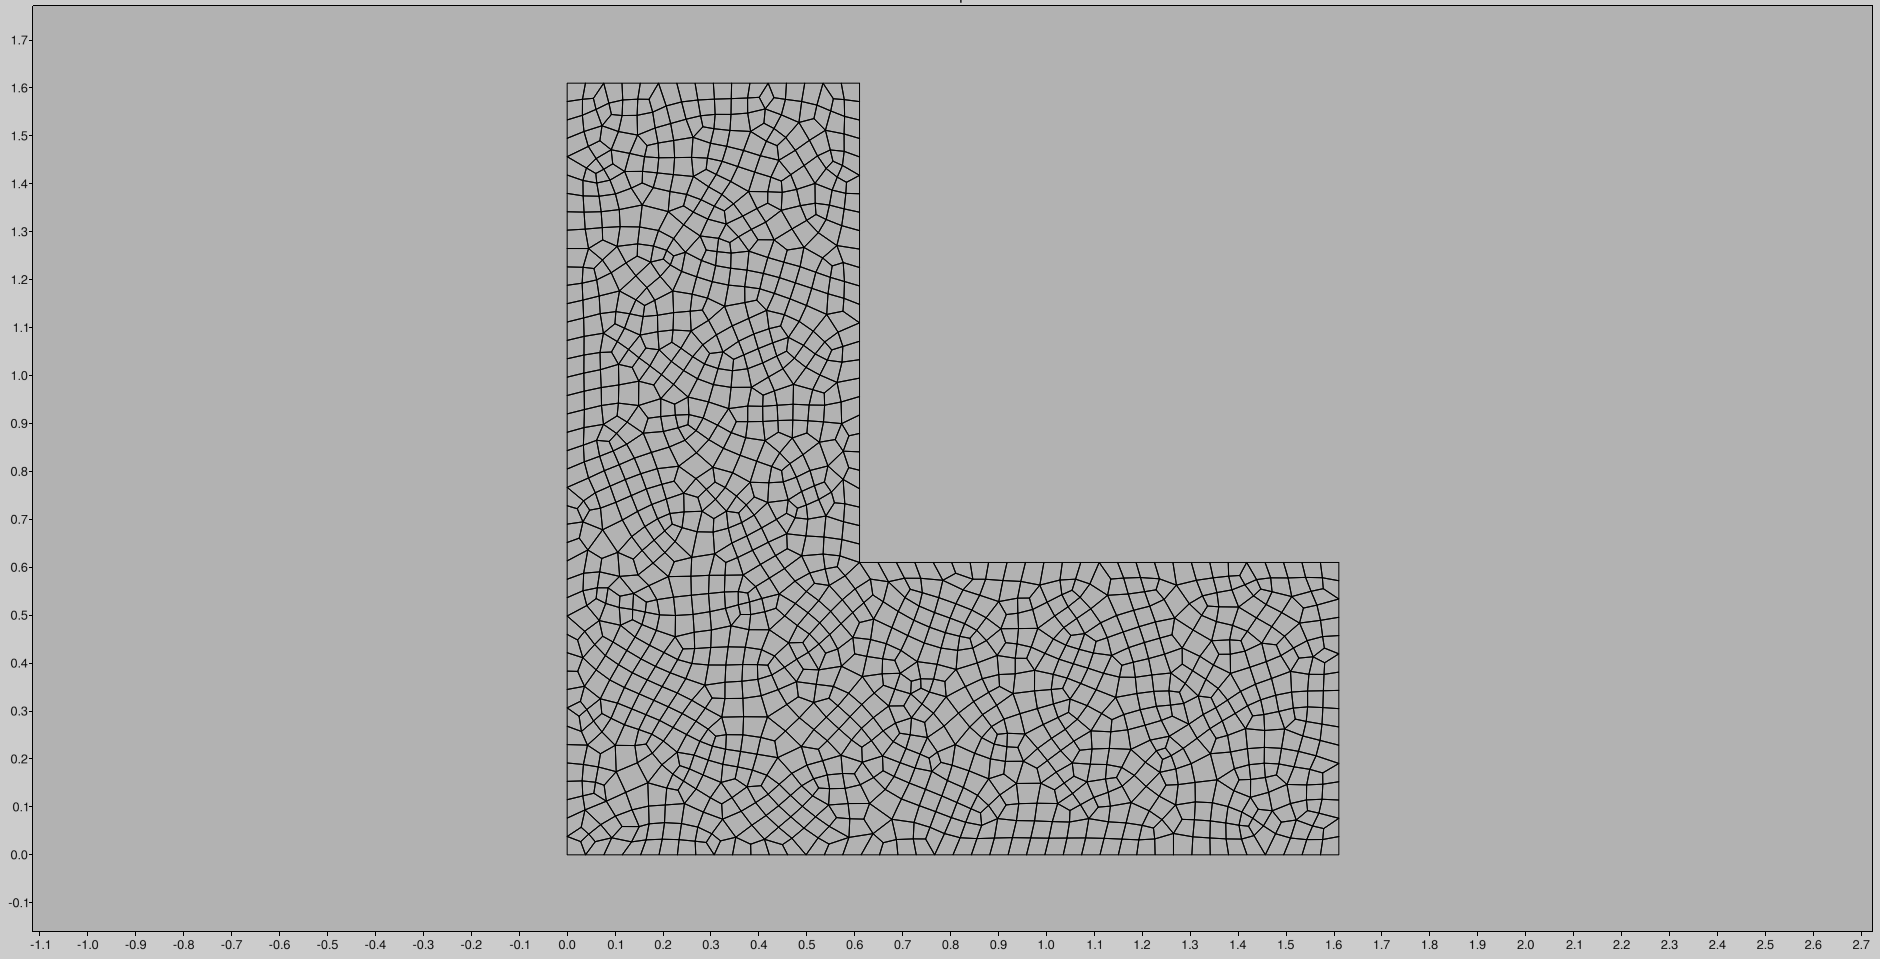

In [4]:
Image("mesh.png")

In [5]:
dir_path = os.path.join('C:\\', 'Users', 'vmk10', 'Documents', 'UFRJ', 'Notebooks_2019.2', 'Analise Numerica', 'Heat_Equation_Finite_Elements')
info_path = os.path.join(dir_path, "mesh_info.txt")
info = open(info_path, "r")
print("Informações da malha \n")
print(info.read())

Informações da malha 

Number of nodes 1483
Number of equations 1345
Number of elements 1398



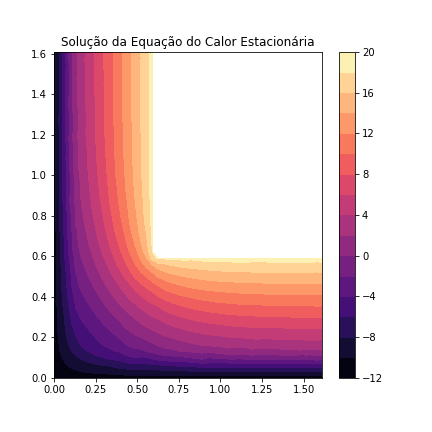

In [6]:
Image("stationary_zero_flux_plot.png")

#### Problema no tempo:

Agora vamos considerar, sob estas mesmas condições(domínio, materiais, fronteira, fluxo), a evolução da temperatura ao longo do tempo. Para ser mais interessante, vamos considerar um longo intervalo de tempo, para observar como a distribuição da temperatura se aproxima da solução estacionária com o passar do tempo. 

Repare que agora nos vamos resolver a equação inicialmente apresentada: $\rho C_v \frac{\partial T}{\partial t} - \nabla \bullet [\kappa \bullet \nabla T ] = s(\mathbf{x}, t)$.

Primeiro, vamos considerar que não há uma fonte interna de calor, isto é, $s(\mathbf{x}, t) \equiv 0$ e que não há ganho ou perda de calor na fronteira de Neumann, isto é, $\overline{q} \equiv 0$.

Vamos considerar também que a temperatura inicial fora das fronteiras prescritas é zero, isto é, $T_0 = 0$.

In [7]:
Video("zero_flux_in_time.mp4")

Agora vamos considerar um fluxo não nulo $\overline{q}(\mathbf{x}, t) = \frac{t}{2}$ nas fronteiras de Neumann. Note que, neste caso, há a entrada de calor no meio. Vamos considerar o intervalo de tempo $[0, 30000]$.

Abaixo, temos o gráfico da solução estacionária com fluxo $\overline{q}(\mathbf{x}, t) = \frac{30000}{2}$.

Em seguida, apresentamos a animação da evolução da temperatura, dado este fluxo, ao longo do tempo.

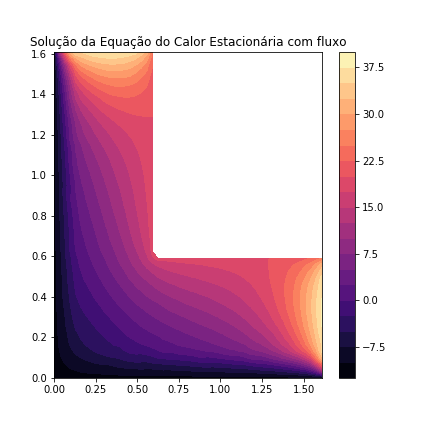

In [8]:
Image("stationary_with_flux_plot.png")

In [9]:
Video("with_flux_in_time.mp4")

Referências:

B.D Reddy, Introductory Functional Analysis: with applications to boundary value problems and finite elements, Springer-Verlag, 1998.